# Analysis of QSAR data

# Import of data 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore') #ignore warning to imporve readability
pd.set_option("display.max_columns", 300) #make every column visible
plt.style.use("ggplot")
%matplotlib inline

In [11]:
from func import evaluate_classifier #plot confusion matrix and evaluate model using multible test metrics
from func import plot_coefs #plot coefficients for Regression models

plt.rcParams["figure.figsize"] = [10,5] #setting for correct size of confusion matrix

#Initialize storing for results, in order to easily compare multiple models
results_dict_list = []
results_model_names_list = []

In [12]:
dataset = pd.read_csv("biodeg.csv",sep = ";",header = None)

In [14]:
dataset.head() #check columns

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [15]:
f = open("data_description.txt", "r")
data_description = pd.DataFrame(columns = ["short", "description"])
info = "start"
while len(info):
    info = f.readline()
    if not info: 
        break
    info = info.split(") ",1)[1][:-2]
    short = info.split(": ",1)[0]
    #description = info.split(": ",1)[1]
    data_description.loc[len(data_description)] = info.split(": ",1)

In [16]:
data_description.to_csv("data_description.csv", index=False)
data_description = pd.read_csv("data_description.csv")

In [17]:
data_description.sort_values("short") 

,short,description
23,B01[C-Br],Presence/absence of C - Br at topological dist...
24,B03[C-Cl],Presence/absence of C - Cl at topological dist...
28,B04[C-Br],Presence/absence of C - Br at topological dist...
7,C%,Percentage of C atom
32,C-026,R--CX--
3,F01[N-N],Frequency of N-N at topological distance
33,F02[C-N],Frequency of C - N at topological distance
10,F03[C-N],Frequency of C-N at topological distance
15,F03[C-O],Frequency of C - O at topological distance
4,F04[C-N],Frequency of C-N at topological distance


In [26]:
dataset.columns = data_description.short

In [27]:
dataset.head()

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


In [35]:
dataset.dtypes.value_counts()

int64      24
float64    17
object      1
dtype: int64

In [21]:
dataset.isnull().sum().sum()


0

In [25]:
#dataset.replace(["RB","NRB"],[1,0], inplace = True) #We apply decoding here, already done so we don't need to do  this again

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [40]:
dataset.head()

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


In [28]:

dataset.rename(columns = {"experimental class": "issue"}, inplace = True);

In [60]:
dataset.to_csv("biodeg_cleaned.csv", index=False)
dataset = pd.read_csv("biodeg_cleaned.csv")

In [61]:
dataset.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,issue
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


In [62]:
dataset.describe()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,issue
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,1.436967,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,0.008531,0.073934,0.029384,1.238727,1.405687,0.039810,0.147867,0.031280,2.215641,-0.001206,0.026540,8.780510,2.668344,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,0.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,3.116577,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,0.101802,0.317475,0.217997,0.096466,4.788542,0.195606,0.355137,0.199544,0.226131,0.158928,0.160812,11.895889,2.096607,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,0.000000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.101000,-0.008000,0.000000,0.000000,1.446500,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.247000,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,2.000000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.358000,0.005000,0.000000,12.465000,3.146000,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,1.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.859000,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,1.000000


Text(0.5, 0, 'Column Name')

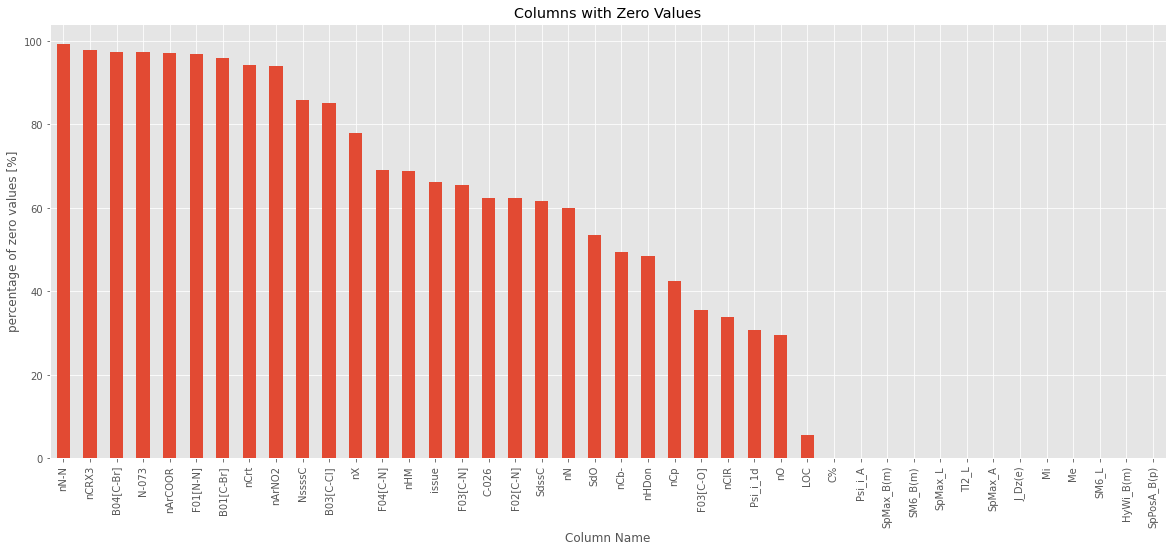

In [65]:
zeros = [round(sum(dataset.iloc[:,i] == 0)/len(dataset),3)*100 for i in range(dataset.shape[1])]
zero = pd.DataFrame(zeros , index = dataset.columns).sort_values(by=0, ascending = False)

#plot results
zero.plot(kind = "bar", legend = False, figsize =(20,8))
plt.title("Columns with Zero Values")
plt.ylabel("percentage of zero values [%]")
plt.xlabel("Column Name")

In [68]:
dataset["issue"].value_counts(normalize = True)
# NRB = 0 --> Not Biodegradable
# RB = 1 --> Biodegradable

0    0.662559
1    0.337441
Name: issue, dtype: float64

In [71]:
#check for correlation with target 
abs(dataset.corr()["issue"]).sort_values(ascending = False).head(11)

issue          1.000000
SpMax_L        0.396138
SpMax_A        0.389951
SpPosA_B(p)    0.372254
SM6_B(m)       0.366793
HyWi_B(m)      0.343779
SM6_L          0.343377
nCb-           0.337268
C-026          0.318547
nHM            0.299107
SpMax_B(m)     0.289619
Name: issue, dtype: float64

In [72]:
df.corr().applymap(lambda x: x if abs(x)>.90 else "")

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
short,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SpMax_L,1,,,,,,,,,,,,,,0.911546,,,,,,,,,,,,0.918928,,,,,,,,,,,,,,
J_Dz(e),,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nHM,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F01[N-N],,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F04[C-N],,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NssssC,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCb-,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C%,,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCp,,,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [76]:
corr_drop = ["SM6_L","SpMax_A","SM6_B(m)"]
corr_keep = list(set(dataset.columns)-set(corr_drop))

In [78]:
# split data into degradable and nondegradable subsets
bio_df = dataset.loc[dataset["issue"] == 1]
no_bio_df = dataset.loc[dataset["issue"] == 0]

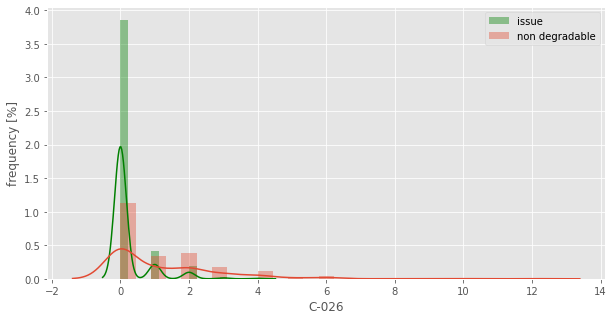

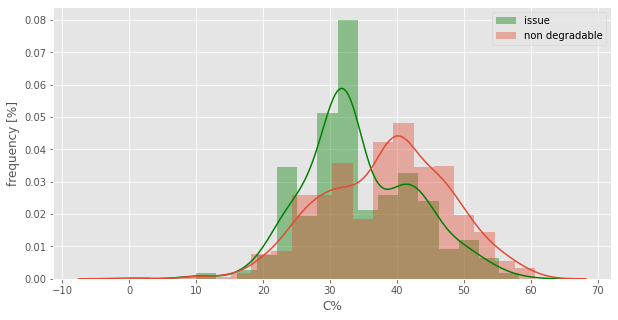

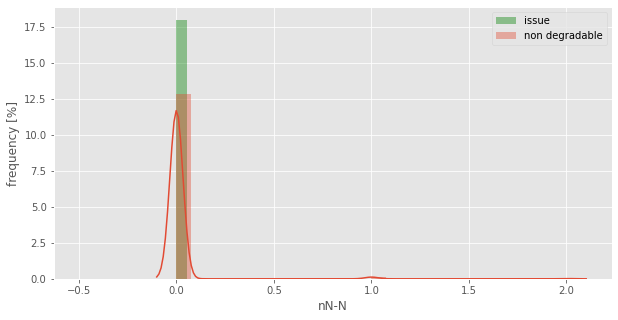

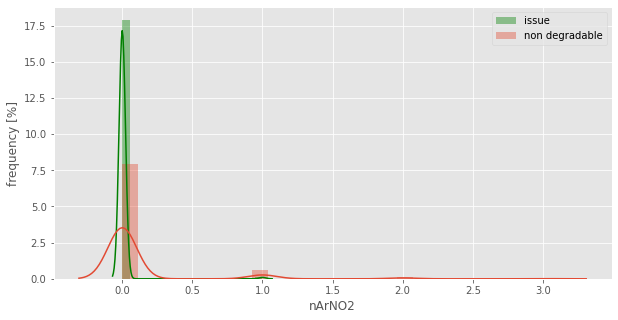

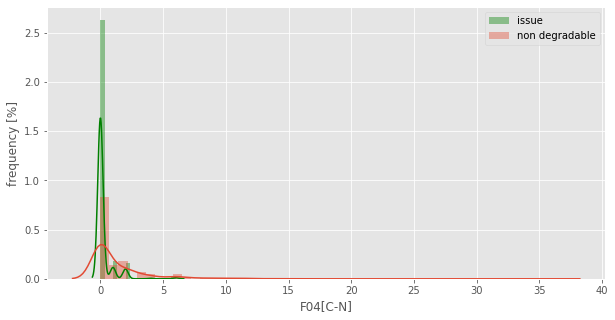

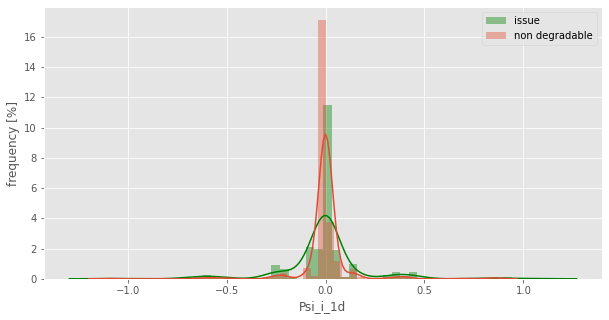

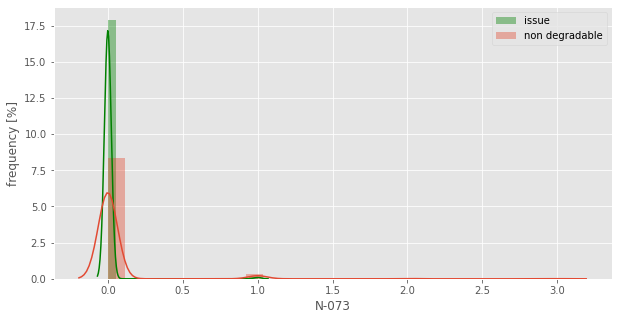

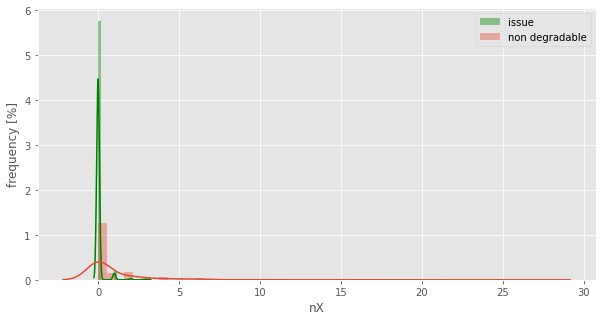

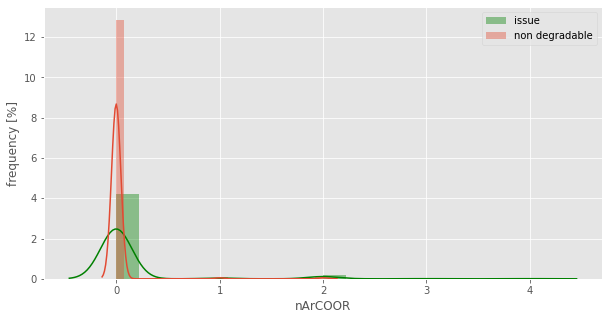

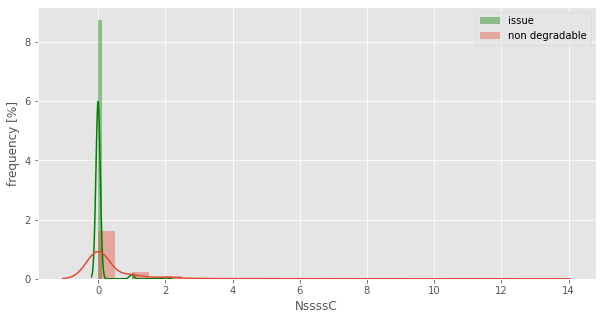

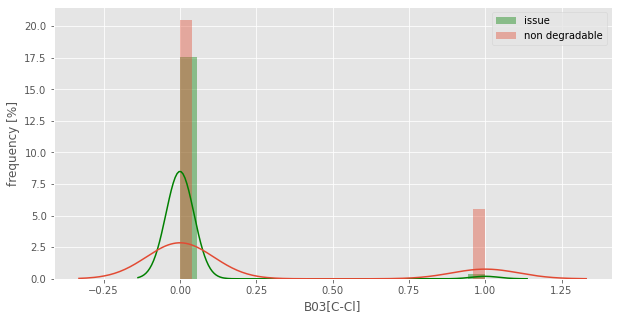

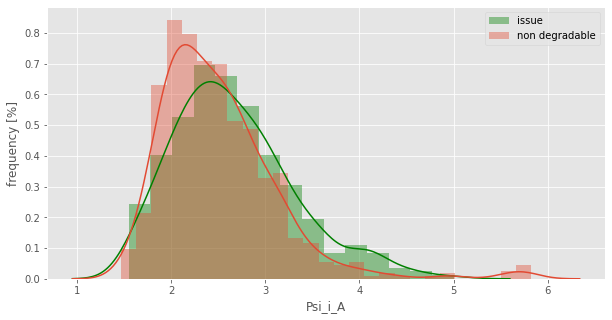

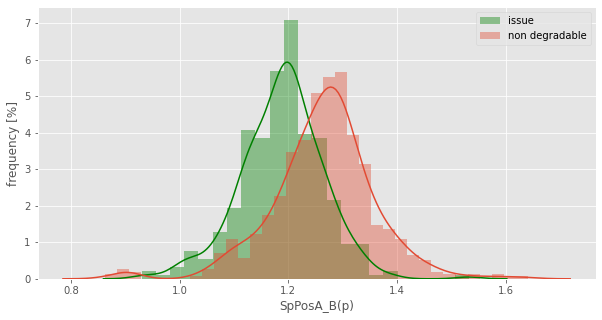

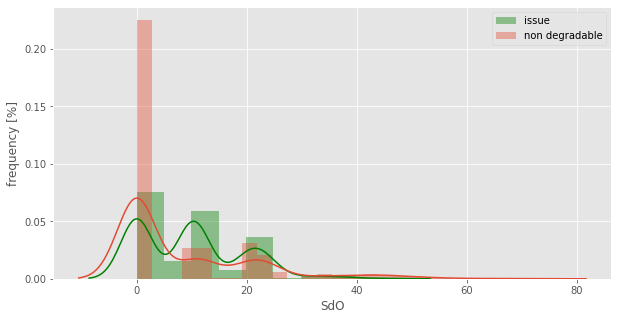

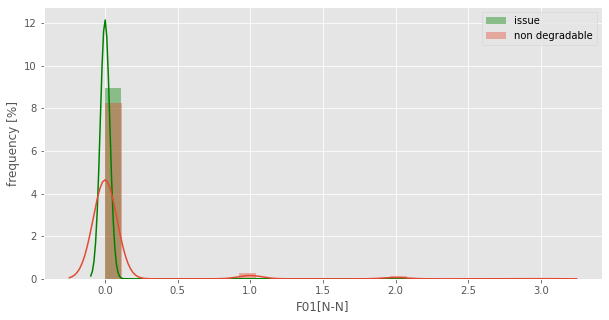

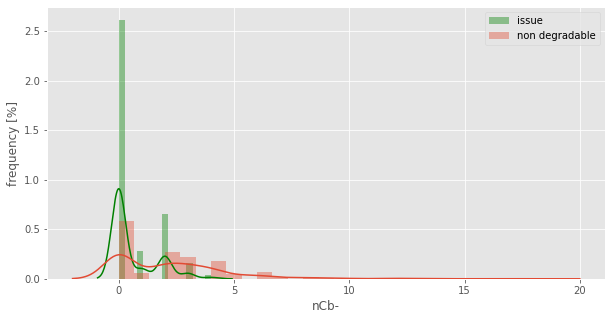

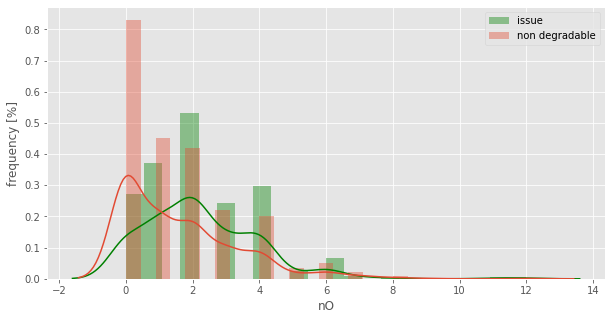

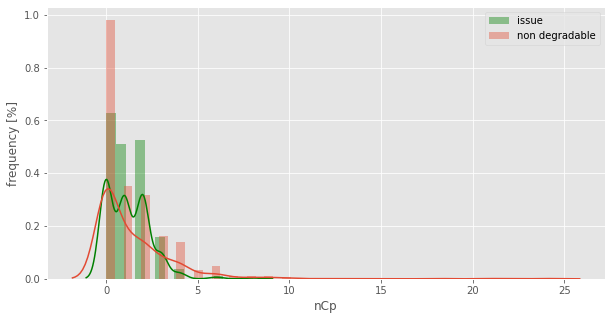

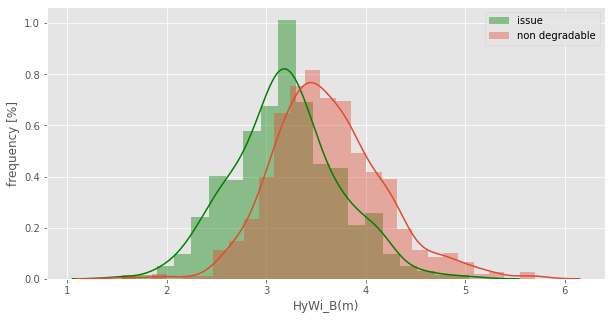

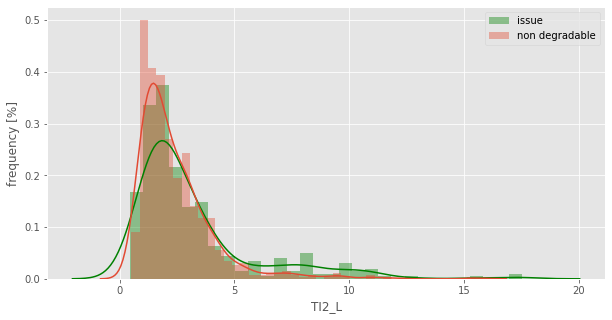

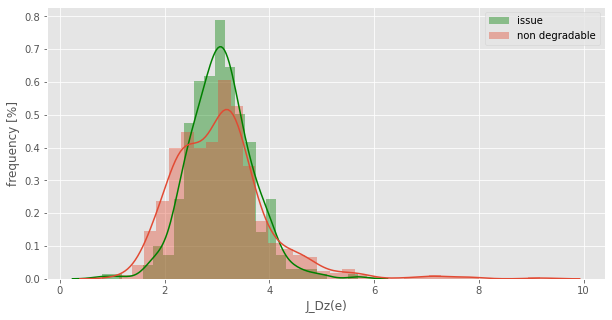

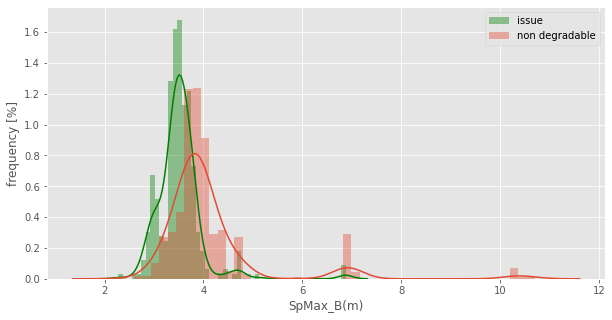

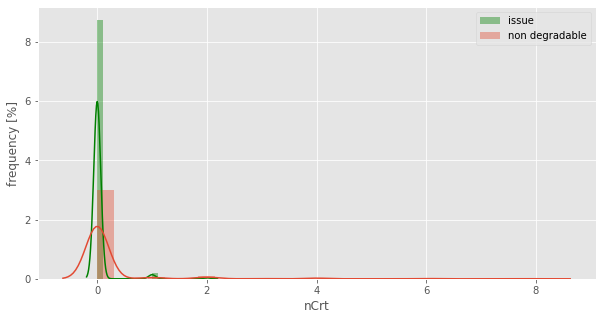

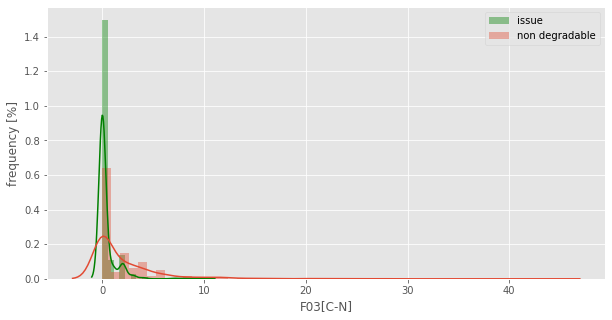

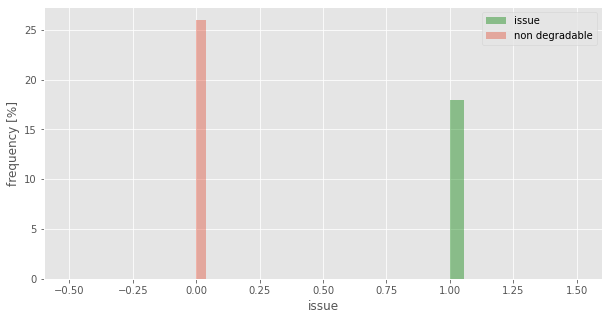

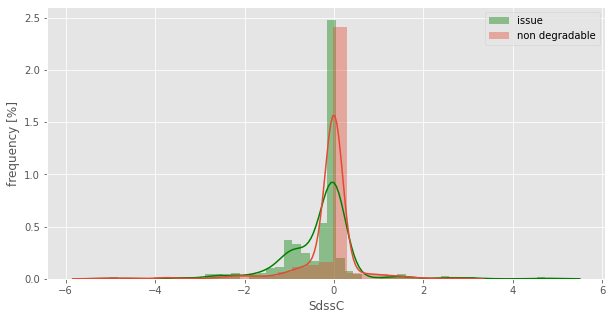

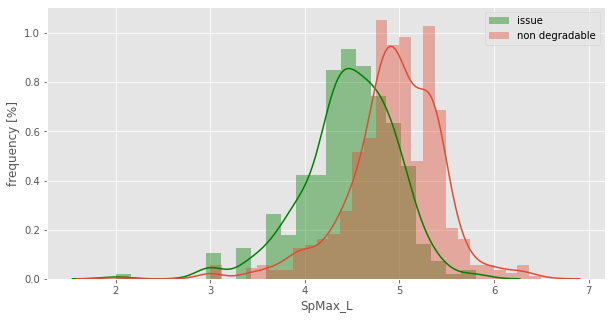

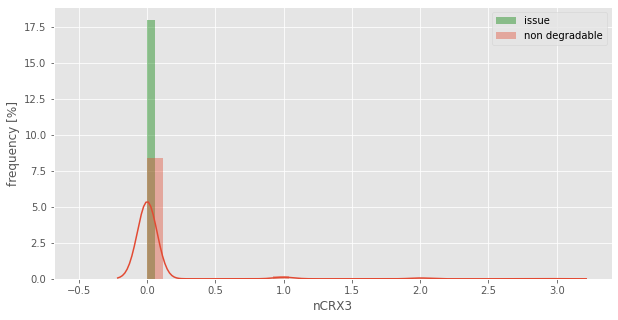

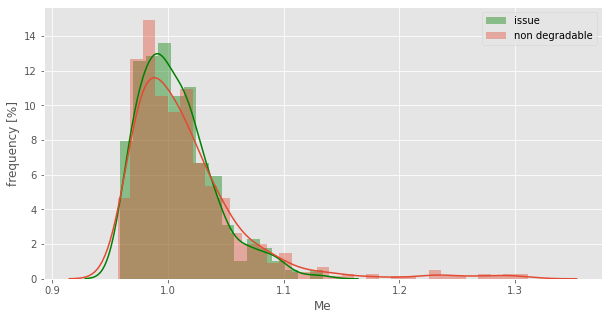

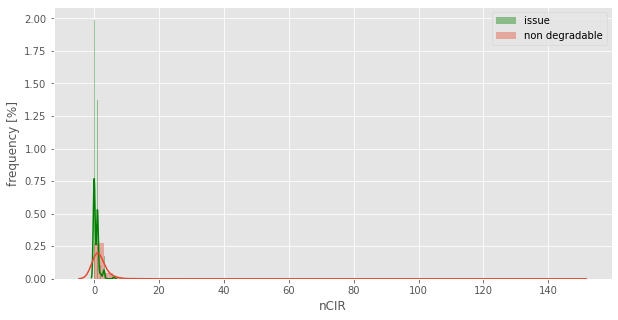

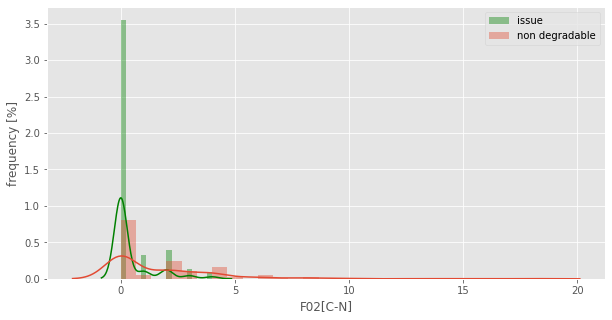

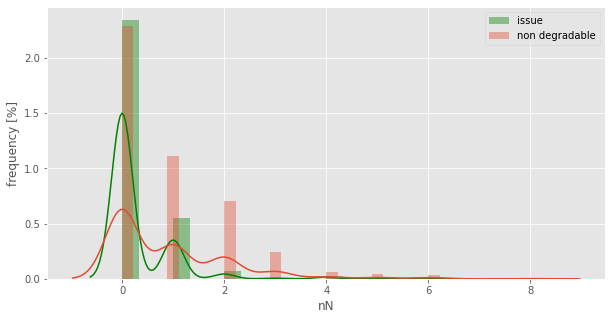

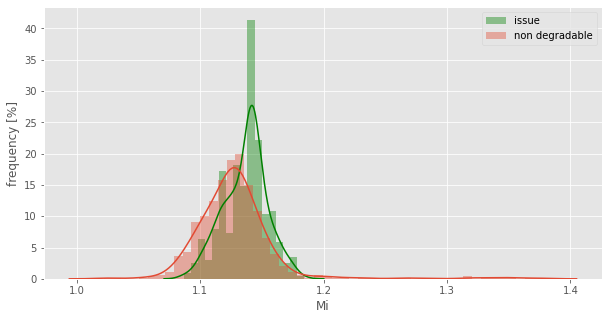

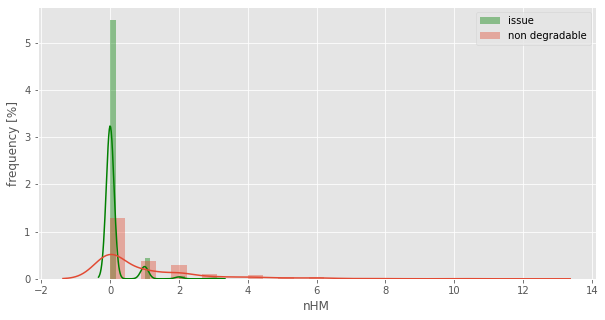

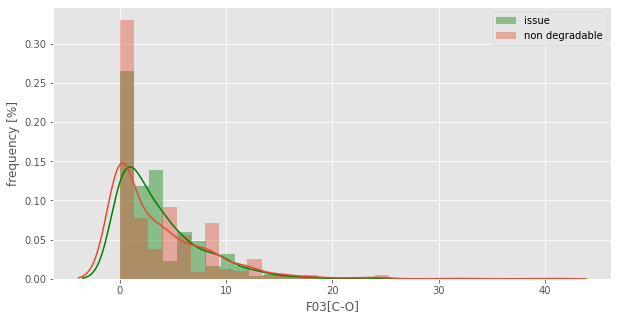

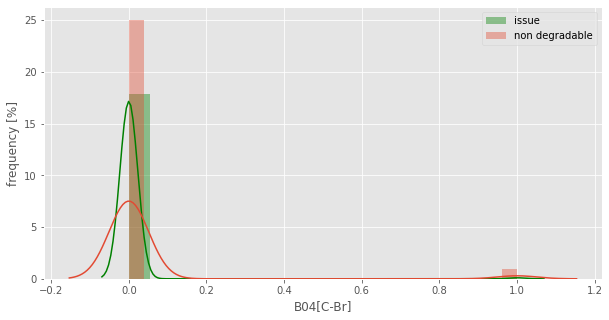

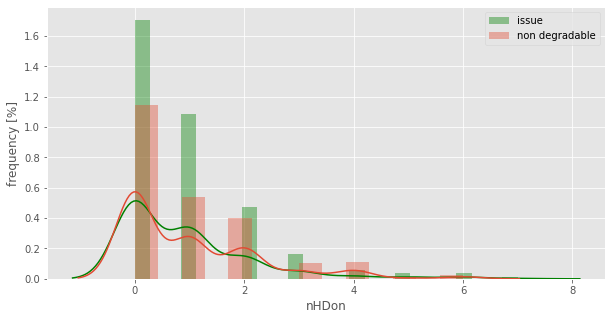

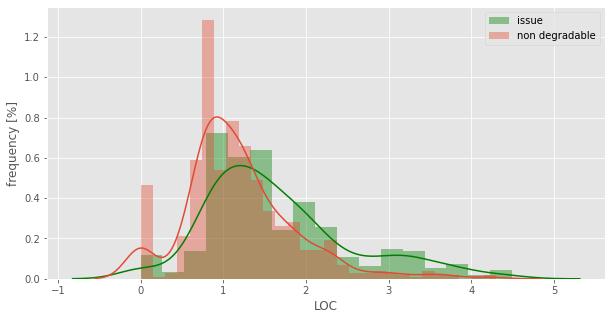

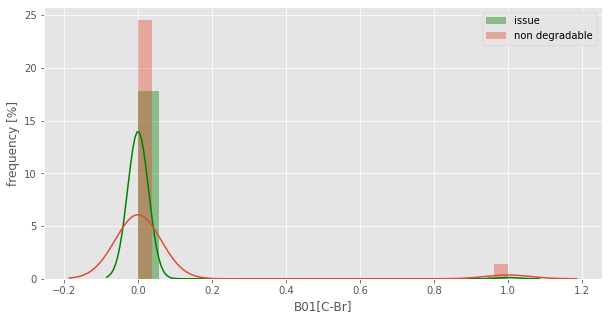

In [79]:
features = corr_keep #only use the features that are not cocorrelated

#plot the features side by side
for col in list(filter(lambda x: x != "diagnosis", features)):
    sns.distplot(bio_df[col] ,label = "issue", color = "g")
    sns.distplot(no_bio_df[col], label = "non degradable" )
    plt.ylabel("frequency [%]")
    plt.legend()
    plt.show()

In [80]:
#If a feature has more then 10 unique values it is probably not categorical, but continuous.
features = corr_keep

#initialize storing variables
continous = []
discrete = []

#check for features less then 10 different values
for col in features:
    valc = dataset[col].value_counts(normalize = True)
    if len(valc)<10:
        print(col)
        print(valc)
        print("--------------")
        discrete.append(col)
    else:
        continous.append(col)

nN-N
0    0.992417
1    0.006635
2    0.000948
Name: nN-N, dtype: float64
--------------
nArNO2
0    0.940284
1    0.047393
2    0.010427
3    0.001896
Name: nArNO2, dtype: float64
--------------
N-073
0    0.972512
1    0.024645
2    0.001896
3    0.000948
Name: N-073, dtype: float64
--------------
nArCOOR
0    0.971564
2    0.018009
1    0.008531
4    0.000948
3    0.000948
Name: nArCOOR, dtype: float64
--------------
B03[C-Cl]
0    0.852133
1    0.147867
Name: B03[C-Cl], dtype: float64
--------------
F01[N-N]
0    0.968720
1    0.020853
2    0.009479
3    0.000948
Name: F01[N-N], dtype: float64
--------------
nCrt
0    0.942180
1    0.022749
2    0.020853
4    0.007583
6    0.002844
3    0.001896
8    0.000948
5    0.000948
Name: nCrt, dtype: float64
--------------
issue
0    0.662559
1    0.337441
Name: issue, dtype: float64
--------------
nCRX3
0    0.979147
1    0.013270
2    0.006635
3    0.000948
Name: nCRX3, dtype: float64
--------------
nN
0    0.600948
1    0.224645
2    0.1

# Choose the best Model of prediction

In [ ]:
from sklearn.model_selection import train_test_split

In [38]:
dataset = pd.read_csv('biodeg_cleaned.csv')

In [43]:
y = dataset.issue
X = dataset.iloc[:,:-1]
X_train, X_test, y_train , y_test = train_test_split(X,y ,random_state=42 , test_size = 0.3)

In [44]:
X_train.shape, X_test.shape


((738, 41), (317, 41))

In [45]:
y_train.shape , y_test.shape


((738,), (317,))

In [46]:
from sklearn.preprocessing import StandardScaler


In [47]:
from sklearn.preprocessing import PolynomialFeatures


In [48]:
poly = PolynomialFeatures(2,include_bias = False)
poly.fit(X_train)
X_train_poly = (pd.DataFrame(poly.transform(X_train),columns = poly.get_feature_names(X_train.columns)))
X_test_poly = (pd.DataFrame(poly.transform(X_test),columns = poly.get_feature_names(X_train.columns)))

In [49]:
scaler_poly = StandardScaler()
scaler_poly.fit(X_train_poly)
X_train_poly = pd.DataFrame(scaler_poly.transform(X_train_poly),columns = X_train_poly.columns)
X_test_poly = pd.DataFrame(scaler_poly.transform(X_test_poly),columns = X_train_poly.columns)

In [50]:
scaler_lin = StandardScaler()
scaler_lin.fit(X_train)
X_train = pd.DataFrame(scaler_lin.transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler_lin.transform(X_test),columns = X_train.columns)

In [54]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

Normalized confusion matrix
[[0.88995215 0.11004785]
 [0.13888889 0.86111111]]


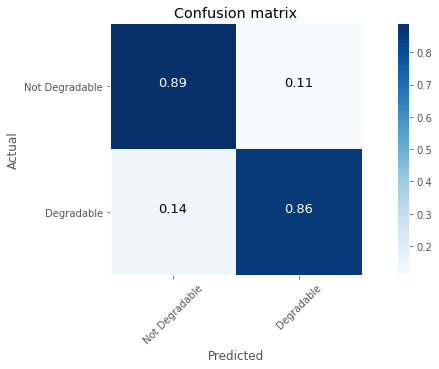

Our Accuracy is: 0.8801261829652997
Our Precision is: 0.8017241379310345
Our Sensitivity is: 0.8611111111111112
Our F-Score is: 0.8303571428571429


In [55]:
#instantiate and fit model on the training set and then run a prediction on the test set
logReg_base = LogisticRegression(random_state=42)
logReg_base.fit(X_train,y_train)
logReg_base_pred = logReg_base.predict(X_test)

#save results for model selection
results_dict_list.append(evaluate_classifier(y_test,logReg_base_pred, normalize=True))
results_model_names_list.append("LogR_base")

<Figure size 1152x1080 with 0 Axes>

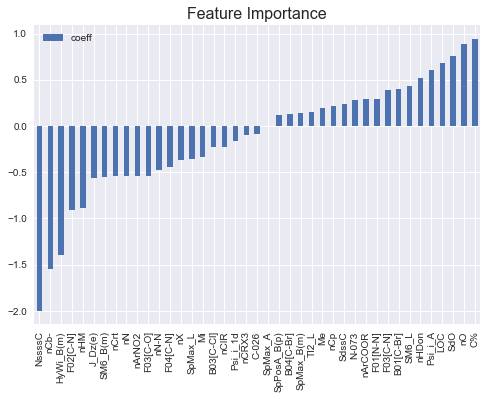

Index([], dtype='object')

In [56]:
#plot feature importance
plot_coefs(X_train,logReg_base)


Normalized confusion matrix
[[0.88038278 0.11961722]
 [0.13888889 0.86111111]]


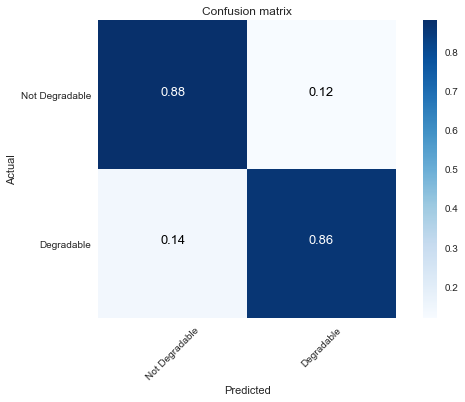

Our Accuracy is: 0.8738170347003155
Our Precision is: 0.788135593220339
Our Sensitivity is: 0.8611111111111112
Our F-Score is: 0.8230088495575221


<Figure size 1152x1080 with 0 Axes>

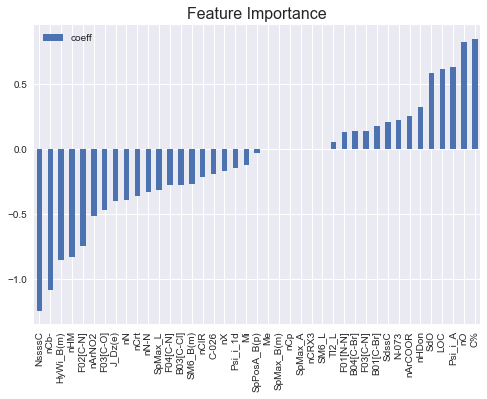

In [57]:
logReg_base_l1 = LogisticRegression(solver = "saga", penalty = "l1", C = 0.7, random_state=42)
logReg_base_l1.fit(X_train,y_train)
logReg_base_l1_pred = logReg_base_l1.predict(X_test)

results_dict_list.append(evaluate_classifier(y_test,logReg_base_l1_pred, normalize=True))
results_model_names_list.append("LogR_lin_l1")

#select features with a coefician of zero to be dropped
drop_l1 = plot_coefs(X_train,logReg_base_l1)


In [58]:
# keep all the features from the above figure, that dont have a coefficent of zero
l1_keep = list(set(X_train.columns) - set(drop_l1))
l1_keep

['F03[C-O]',
 'nN-N',
 'SpPosA_B(p)',
 'nArCOOR',
 'F02[C-N]',
 'nO',
 'B03[C-Cl]',
 'F03[C-N]',
 'nHM',
 'Psi_i_1d',
 'SM6_B(m)',
 'SdssC',
 'nHDon',
 'B01[C-Br]',
 'SdO',
 'nArNO2',
 'SpMax_L',
 'J_Dz(e)',
 'C%',
 'N-073',
 'nN',
 'B04[C-Br]',
 'TI2_L',
 'HyWi_B(m)',
 'LOC',
 'nCrt',
 'nCb-',
 'Mi',
 'nCIR',
 'NssssC',
 'Psi_i_A',
 'F01[N-N]',
 'nX',
 'C-026',
 'F04[C-N]']

In [59]:
from sklearn.ensemble import RandomForestClassifier


Normalized confusion matrix
[[0.92822967 0.07177033]
 [0.19444444 0.80555556]]


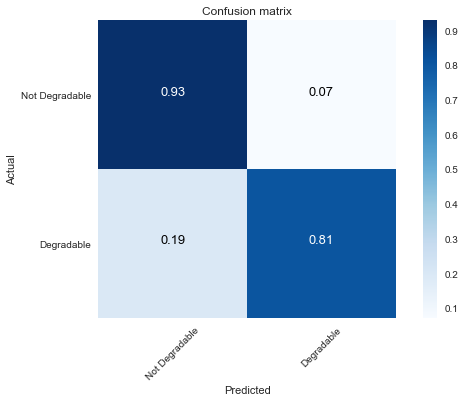

Our Accuracy is: 0.886435331230284
Our Precision is: 0.8529411764705882
Our Sensitivity is: 0.8055555555555556
Our F-Score is: 0.8285714285714286


In [60]:
forest_base = RandomForestClassifier(n_estimators=100, random_state=42)

forest_base.fit(X_train,y_train)
forest_base_pred = forest_base.predict(X_test)

results_dict_list.append(evaluate_classifier(y_test,forest_base_pred, normalize=True));
results_model_names_list.append("RandFor_lin")

In [61]:
from sklearn.neighbors import KNeighborsClassifier


Normalized confusion matrix
[[0.81818182 0.18181818]
 [0.16666667 0.83333333]]


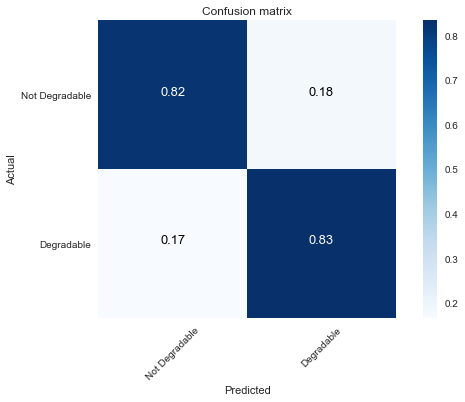

Our Accuracy is: 0.8233438485804416
Our Precision is: 0.703125
Our Sensitivity is: 0.8333333333333334
Our F-Score is: 0.7627118644067796


In [62]:
KNN_base = KNeighborsClassifier(n_neighbors = 13)

KNN_base.fit(X_train,y_train)
KNN_base_pred = KNN_base.predict(X_test)

results_dict_list.append(evaluate_classifier(y_test,KNN_base_pred, normalize=True));
results_model_names_list.append("KNN_lin")

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [64]:
clf1 = logReg_base_l1
clf2 = forest_base
clf3 = KNN_base
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('KNN', clf3)], voting='hard')
eclf.fit(X_train,y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'KNN', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    print("F1: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

F1: 0.78 (+/- 0.04) [Logistic Regression]
F1: 0.78 (+/- 0.03) [Random Forest]
F1: 0.79 (+/- 0.04) [KNN]
F1: 0.80 (+/- 0.05) [Ensemble]


Normalized confusion matrix
[[0.89473684 0.10526316]
 [0.15740741 0.84259259]]


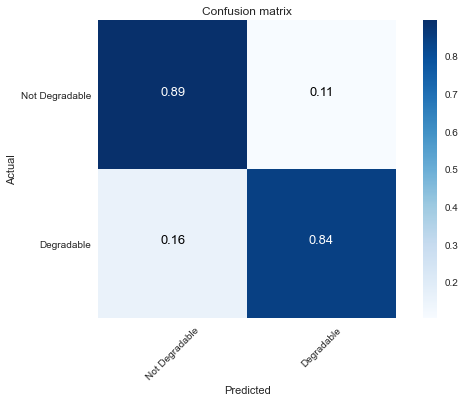

Our Accuracy is: 0.8769716088328076
Our Precision is: 0.8053097345132744
Our Sensitivity is: 0.8425925925925926
Our F-Score is: 0.8235294117647058


In [65]:
eclf_base_pred = eclf.predict(X_test)
results_dict_list.append(evaluate_classifier(y_test,eclf_base_pred, normalize=True));
results_model_names_list.append("Ensemble_lin")

In [66]:
X_train = X_train_poly.copy()
X_test = X_test_poly.copy()

Normalized confusion matrix
[[0.79425837 0.20574163]
 [0.09259259 0.90740741]]


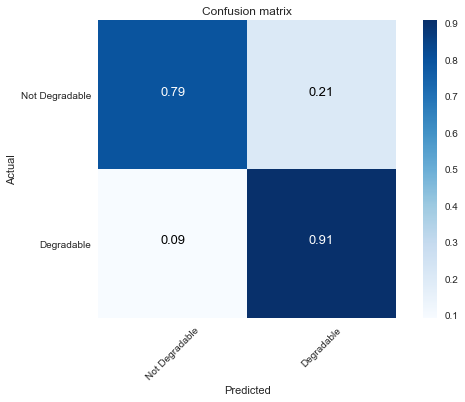

Our Accuracy is: 0.832807570977918
Our Precision is: 0.6950354609929078
Our Sensitivity is: 0.9074074074074074
Our F-Score is: 0.7871485943775101


<Figure size 1152x1080 with 0 Axes>

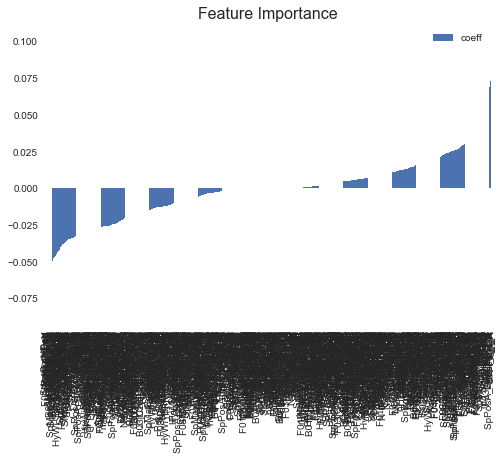

In [67]:
logReg_base_l1_poly = LogisticRegression(solver = "saga", penalty = "l1", C = 1, random_state=42)

logReg_base_l1_poly.fit(X_train_poly,y_train)
logReg_base_l1_poly_pred = logReg_base_l1_poly.predict(X_test_poly)
results_dict_list.append(evaluate_classifier(y_test,logReg_base_l1_poly_pred, normalize=True))
drop_l1_poly = plot_coefs(X_train_poly,logReg_base_l1_poly)
results_model_names_list.append("LogR_poly")

Normalized confusion matrix
[[0.92822967 0.07177033]
 [0.17592593 0.82407407]]


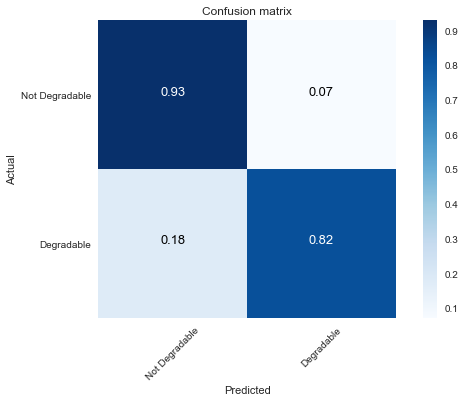

Our Accuracy is: 0.8927444794952681
Our Precision is: 0.8557692307692307
Our Sensitivity is: 0.8240740740740741
Our F-Score is: 0.839622641509434


In [90]:
forest_base = RandomForestClassifier(n_estimators=100, random_state=42)

forest_base.fit(X_train,y_train)
forest_base_pred = forest_base.predict(X_test)
results_dict_list.append(evaluate_classifier(y_test,forest_base_pred, normalize=True));
results_model_names_list.append("RandFor_poly")

In [69]:
rfc_featimp_df = pd.DataFrame(forest_base.feature_importances_, index = X_train.columns)
sorted_rfc = rfc_featimp_df.sort_values(by = 0, ascending = False)
rfc_add = list(sorted_rfc[sorted_rfc[0]>0.01].head(3).index)
rfc_add

['SpMax_B(m)^2', 'SpMax_L SpPosA_B(p)', 'SpMax_A SpMax_B(m)']

Normalized confusion matrix
[[0.81818182 0.18181818]
 [0.16666667 0.83333333]]


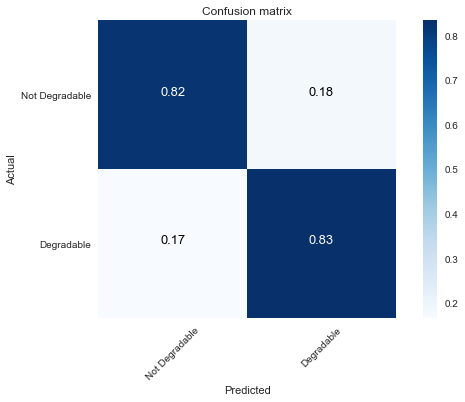

Our Accuracy is: 0.8233438485804416
Our Precision is: 0.703125
Our Sensitivity is: 0.8333333333333334
Our F-Score is: 0.7627118644067796


In [91]:
KNN_base = KNeighborsClassifier(n_neighbors = 13)

KNN_base.fit(X_train,y_train)
KNN_base_pred = KNN_base.predict(X_test)
results_dict_list.append(evaluate_classifier(y_test,KNN_base_pred, normalize=True));
results_model_names_list.append("KNN_poly")

In [92]:
clf2 = forest_base
clf3 = KNN_base
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('KNN', clf3)], voting='hard')
eclf.fit(X_train,y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'KNN', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    print("F1: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

F1: 0.78 (+/- 0.04) [Logistic Regression]
F1: 0.76 (+/- 0.03) [Random Forest]
F1: 0.79 (+/- 0.04) [KNN]
F1: 0.79 (+/- 0.04) [Ensemble]


In [93]:
#function for quick comparison
from func import compare_models

In [95]:
out_df = out_df.sort_values(by = "sum", ascending = False)


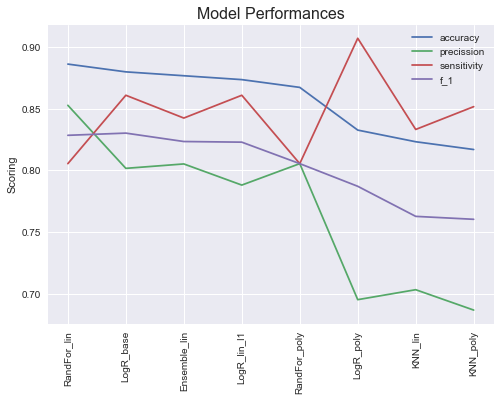

In [96]:
res_cols = ["accuracy","precission","sensitivity","f_1"]
out_df[res_cols].plot()
plt.xticks(rotation=90)
plt.legend(res_cols)
plt.ylabel("Scoring")
plt.title("Model Performances", fontdict = {"fontsize": 16} );

In [77]:
features = list(set(l1_keep).union((lin_cols_all)))
#features

In [78]:
X_train = X_train_poly[features]
X_test = X_test_poly[features]

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [80]:
def custom_scorer(y_true,y_pred):
    f1 = metrics.f1_score(y_true,y_pred)
    acc = metrics.accuracy_score(y_true,y_pred)
    prec = metrics.precision_score(y_true,y_pred)
    sens = metrics.recall_score(y_true,y_pred)
    return f1+acc+prec+sens

In [81]:
lgR_20 = LogisticRegression(random_state = 42)

param_grid = {"solver":["liblinear","saga"],
          "penalty":["l1","l2"],
          "C":np.arange(0.1,1,0.05),
             }

In [82]:
grid_logR = GridSearchCV(estimator = lgR_20,
                         param_grid = param_grid,
                         scoring = make_scorer(custom_scorer),
                         cv = 5,
                         verbose = 4,
                         n_jobs = -1)

In [83]:
grid_logR.fit(X_train,y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring=make_scorer(custom_scorer), verbose=4)

In [84]:
grid_logR.best_score_


3.2328867620181656

Normalized confusion matrix
[[0.92574257 0.07425743]
 [0.19130435 0.80869565]]


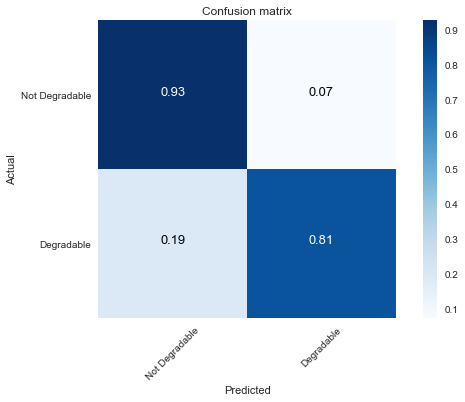

Our Accuracy is: 0.8832807570977917
Our Precision is: 0.8611111111111112
Our Sensitivity is: 0.808695652173913
Our F-Score is: 0.8340807174887893


In [85]:
grid_logR_pred = grid_logR.best_estimator_.predict(X_test)
evaluate_classifier(grid_logR_pred,y_test, normalize=True);

In [86]:
grid_logR.best_params_


{'C': 0.9000000000000002, 'penalty': 'l2', 'solver': 'liblinear'}

Normalized confusion matrix
[[0.92574257 0.07425743]
 [0.19130435 0.80869565]]


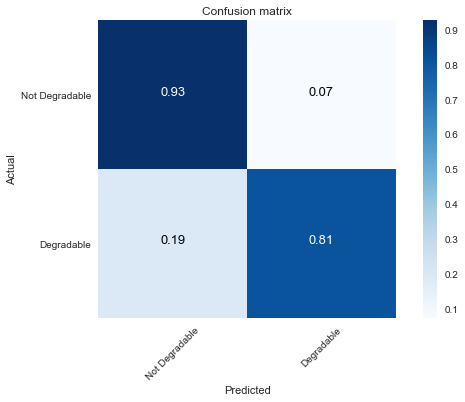

Our Accuracy is: 0.8832807570977917
Our Precision is: 0.8611111111111112
Our Sensitivity is: 0.808695652173913
Our F-Score is: 0.8340807174887893


In [87]:
lgR_2 = LogisticRegression(solver = "liblinear", penalty = "l2", C = 0.9, random_state=42)

lgR_2.fit(X_train,y_train)
lgR_2_pred = lgR_2.predict(X_test)

results_dict_list.append(evaluate_classifier(lgR_2_pred,y_test, normalize=True))


<Figure size 1152x1080 with 0 Axes>

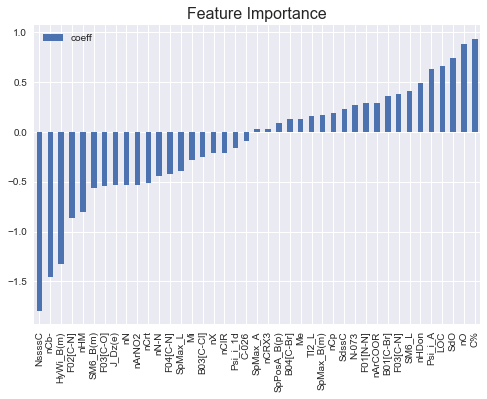

In [88]:
zeros_df = plot_coefs(X_train,lgR_2,return_nulls = False);


In [147]:
#compute feature ranks by absolute value of the coefficients
zeros_df["abs"] = zeros_df.coeff.apply(lambda x: abs(x))
top_20_df = zeros_df.sort_values(by = "abs", ascending = False).head(20)
top_20_df["rank"] = list(range(1,21))

top_20_df[["rank","coeff"]]

,rank,coeff
NssssC,1,-1.794799
nCb-,2,-1.481094
HyWi_B(m),3,-1.362773
nO,4,0.943477
F02[C-N],5,-0.867151
C%,6,0.807507
SdO,7,0.773844
nHM_heavy,8,-0.690481
LOC,9,0.652165
F03[C-O],10,-0.588424


In [149]:
import pickle
with open("lgR_model_save.pickle" ,"wb") as f:   
    pickle.dump(lgR_2,f)